## Problem statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [2]:
# Importing required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Profile of the data

In [4]:
# Importing dataset file (blackFriday_train.CSV)
df = pd.read_csv('blackFriday_train.csv')

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
# Reading first five row & columns of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# shape of the dataset (No of Rows and colunms)
df.shape

(550068, 12)

In [6]:
# Fetching information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
# Columns in the dataset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
# Fetching categorical columns 
cat_col = [fea for fea in df.columns if df[fea].dtype =='O']
print(cat_col)
print(len(cat_col))

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
5


In [9]:
# Fetching Numerical columns 
num_col = [fea for fea in df.columns if df[fea].dtype!='O']
print(num_col)
print(len(num_col))

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
7


In [10]:
# Number of missing values in the data
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# Percentage of missing value columns in dataset
missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
print(missing_percent)
print(len(df.columns[df.isna().any()]))

Product_Category_3            69.672659
Product_Category_2            31.566643
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
dtype: float64
2


In [12]:
# Finding duplicat values in columns
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [13]:
len(df.columns[df.duplicated().any()])
#len(df[df.duplicated()])

0

## Finding number of columns with zero standard deviation

Standard deviation tells about how the values in the dataset are spread. They also tells how far the values in the dataset are from the arithmetic mean of the columns in the dataset.

Sometimes, it may be required to get the standard deviation of a specific column that is numeric in nature. This is where the std() function can be used. The column whose mean needs to be computed can be indexed to the dataframe, and the mean function can be called on this using the dot operator.

The index of the column can also be passed to find the standard deviation.

In [14]:
# Finding columns with zero standard deviation
print(df.std())

User_ID               1727.591586
Occupation               6.522660
Marital_Status           0.491770
Product_Category_1       3.936211
Product_Category_2       5.086590
Product_Category_3       4.125338
Purchase              5023.065394
dtype: float64


In [15]:
# Size occupied in RAM
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category_1            4400544
Product_Category_2            4400544
Product_Category_3            4400544
Purchase                      4400544
dtype: int64

## Statistical Analysis

In [16]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [17]:
# Categorical columns in dataset
cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [18]:
#Numerical columns in dataset
num_col

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [19]:
# Correlation of Numerical columns
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


<AxesSubplot:>

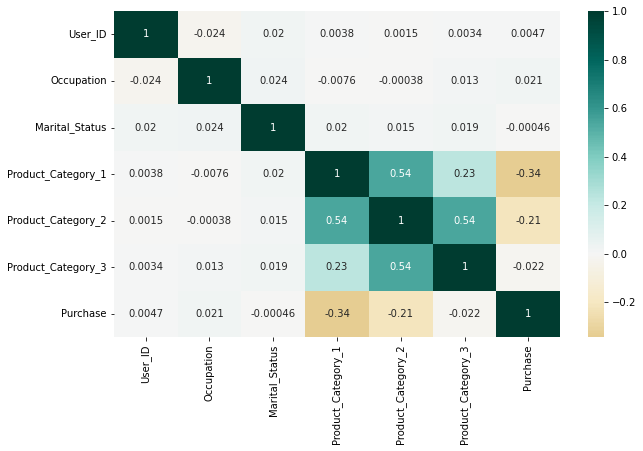

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

In [21]:
df.cov()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,2.984573e+06,-270.113921,17.367619,26.008008,13.461964,24.439292,4.092159e+04
Occupation,-2.701139e+02,42.545100,0.077882,-0.195578,-0.012700,0.354959,6.825547e+02
Marital_Status,1.736762e+01,0.077882,0.241838,0.038497,0.037819,0.039400,-1.144629e+00
Product_Category_1,2.600801e+01,-0.195578,0.038497,15.493760,9.044359,2.438836,-6.795650e+03
Product_Category_2,1.346196e+01,-0.012700,0.037819,9.044359,25.873394,10.092953,-5.538125e+03
Product_Category_3,2.443929e+01,0.354959,0.039400,2.438836,10.092953,17.018411,-4.613754e+02
Purchase,4.092159e+04,682.554656,-1.144629,-6795.650007,-5538.125114,-461.375426,2.523119e+07


In [22]:
df.skew()

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.162758
Product_Category_3   -0.765446
Purchase              0.600140
dtype: float64

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

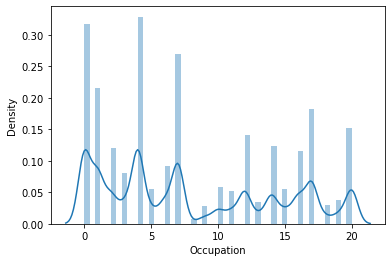

In [23]:
sns.distplot(df['Occupation'])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

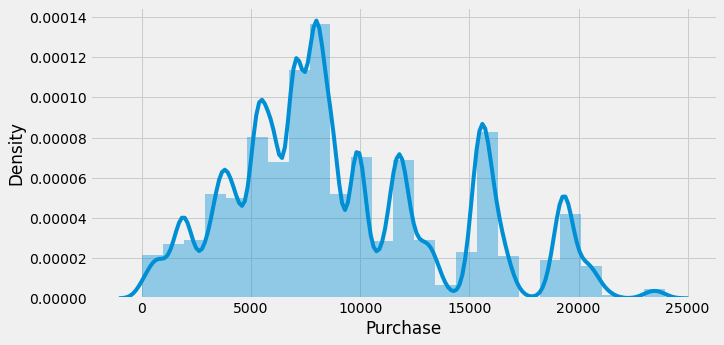

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.distplot(df['Purchase'], bins=25)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

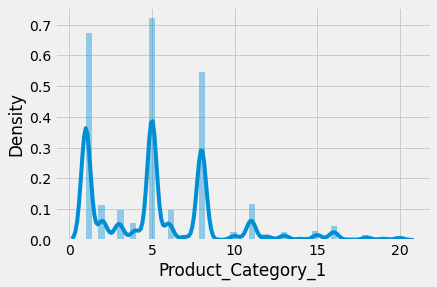

In [25]:
sns.distplot(df['Product_Category_1'])

## Data Visualization

In [26]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [27]:
cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [28]:
data_num = num_col
print(data_num)

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

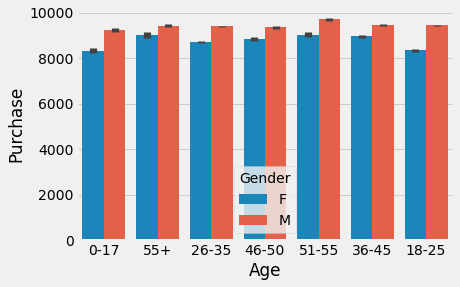

In [29]:
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

## Observation

Purchasing of Men is higher than women

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

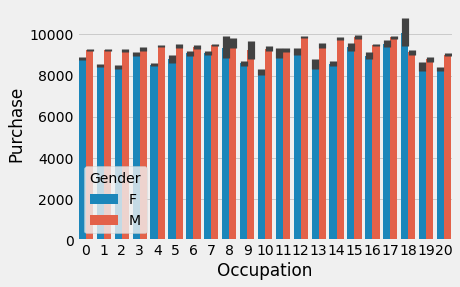

In [30]:
sns.barplot('Occupation','Purchase',hue = 'Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

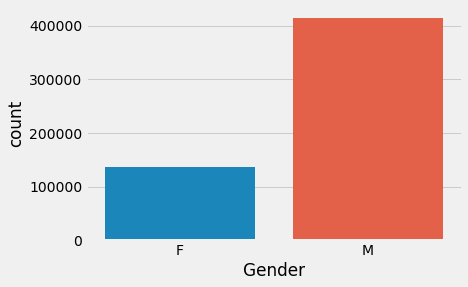

In [31]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

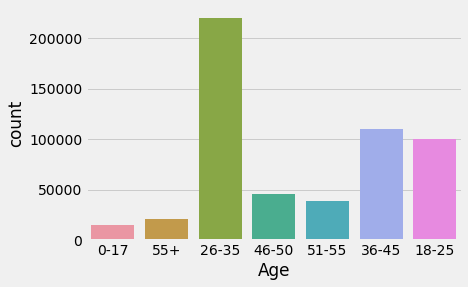

In [32]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

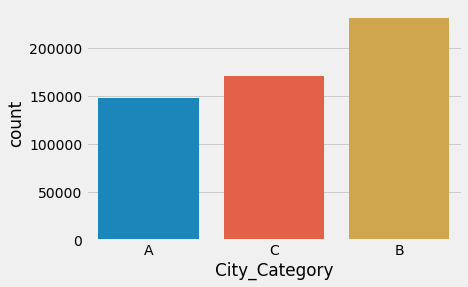

In [33]:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

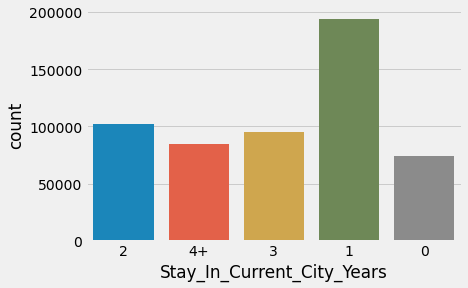

In [34]:
sns.countplot(df['Stay_In_Current_City_Years'])

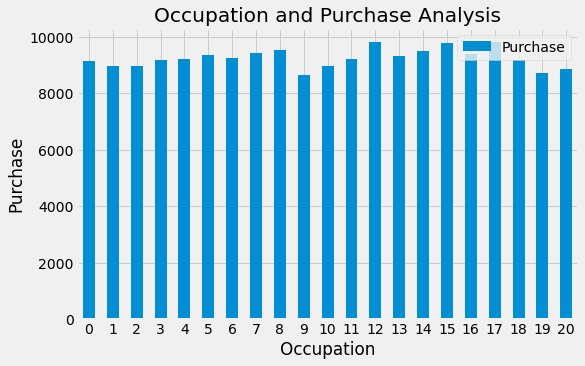

In [35]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

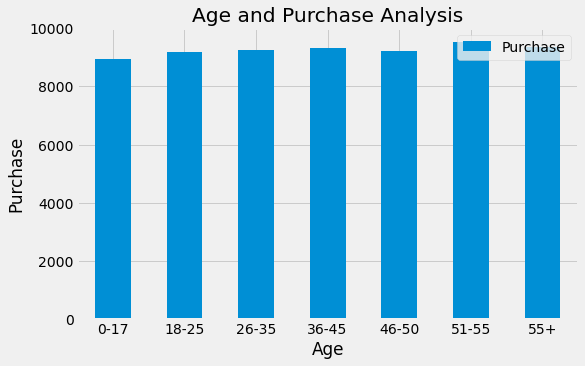

In [36]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

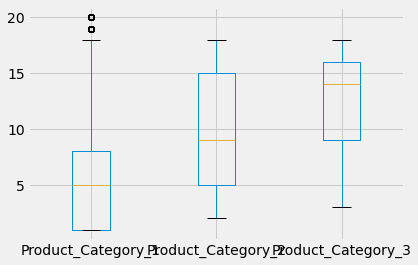

In [37]:
df.boxplot(column=['Product_Category_1','Product_Category_2','Product_Category_3'])

<AxesSubplot:>

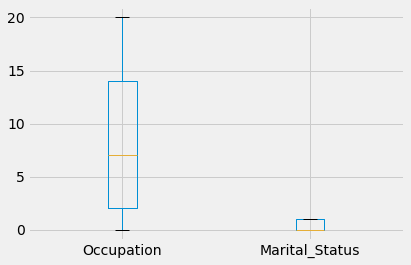

In [38]:
df.boxplot(column=['Occupation','Marital_Status'])

<AxesSubplot:>

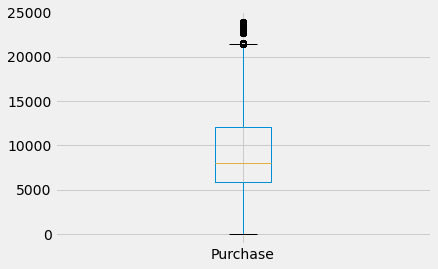

In [39]:
df.boxplot(column=['Purchase'])

## Observation
Product_Category_1 & Purchase columns having a outlier 

## Pre-Processing of the data
## Missing value handling

In [40]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [41]:
print(missing_percent)
print(len(df.columns[df.isna().any()]))

Product_Category_3            69.672659
Product_Category_2            31.566643
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
dtype: float64
2


In [42]:
cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [43]:
num_col

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [44]:
# Droping columns which are having  above 50% missing value
df.drop(columns = ['Product_Category_3'],inplace=True)

In [45]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [46]:
# Imputing numeric Columns with Mean which are having NA value below 50%
df["Product_Category_2"] = df["Product_Category_2"].replace(np.NaN, df["Product_Category_2"].mean())

In [47]:
# Now we dont have any missing value in our dataset
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

## Outlier

<AxesSubplot:>

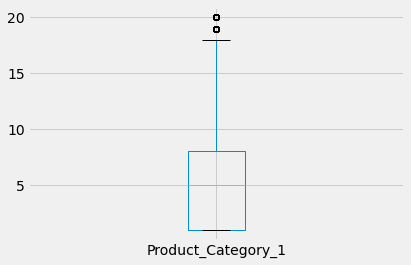

In [48]:
# Detecting Outlier using Boxplot,Below two columns having outlier 
df.boxplot(column=['Product_Category_1'])

<AxesSubplot:>

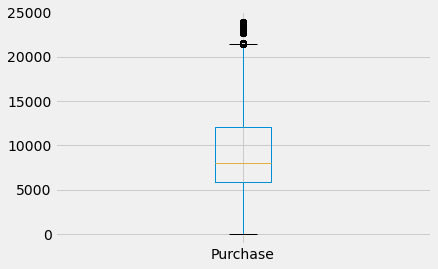

In [49]:
df.boxplot(column=['Purchase'])

In [50]:
# Detecting Outlier using Z-score
z = np.abs(stats.zscore(df['Purchase']))
print(z)

0         0.177973
1         1.181756
2         1.561193
3         1.633858
4         0.257805
            ...   
550063    1.771025
550064    1.770428
550065    1.817013
550066    1.771623
550067    1.746737
Name: Purchase, Length: 550068, dtype: float64


In [51]:
threshold = 3
# Position of the outlier
print(np.where(z > 3))

(array([], dtype=int64),)


In [52]:
z = np.abs(stats.zscore(df['Product_Category_1']))
print(z)

0         0.610809
1         1.118912
2         1.675656
3         1.675656
4         0.659449
            ...   
550063    3.708069
550064    3.708069
550065    3.708069
550066    3.708069
550067    3.708069
Name: Product_Category_1, Length: 550068, dtype: float64


In [53]:
threshold = 3
# Position of the outlier
print(np.where(z > 3))

(array([   304,    796,   1559, ..., 550065, 550066, 550067]),)


In [54]:
# Detecting Outlier using IQR

Q1=df['Purchase'].quantile(0.25)
Q3=df['Purchase'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)


5823.0
12054.0
6231.0
-3523.5 21400.5


In [55]:
df[df['Purchase'] > Upper_Whisker]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,16.0,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,13.0,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,14.0,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,15.0,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,15.0,23341
...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,13.0,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,13.0,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,16.0,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,13.0,23663


In [56]:
df[df['Purchase'] < Lower_Whisker]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [57]:
Q1=df['Product_Category_1'].quantile(0.25)
Q3=df['Product_Category_1'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

1.0
8.0
7.0
-9.5 18.5


In [58]:
df[df['Product_Category_1'] > Upper_Whisker]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,9.842329,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,9.842329,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,9.842329,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,9.842329,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,9.842329,241
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,365


In [59]:
df[df['Product_Category_1'] < Lower_Whisker]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [60]:
df.shape

(550068, 11)

In [61]:
# Upper bound
upper = np.where(df['Product_Category_1'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['Product_Category_1'] <= (Q1-1.5*IQR))

 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

New Shape:  (545915, 11)


<AxesSubplot:>

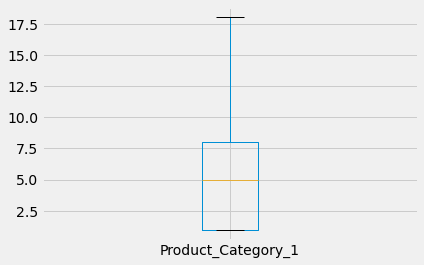

In [63]:
df.boxplot(column=['Product_Category_1'])

## Encoding of categorical columns

In [64]:
cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [65]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.842329,7969


In [66]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,7969


<AxesSubplot:>

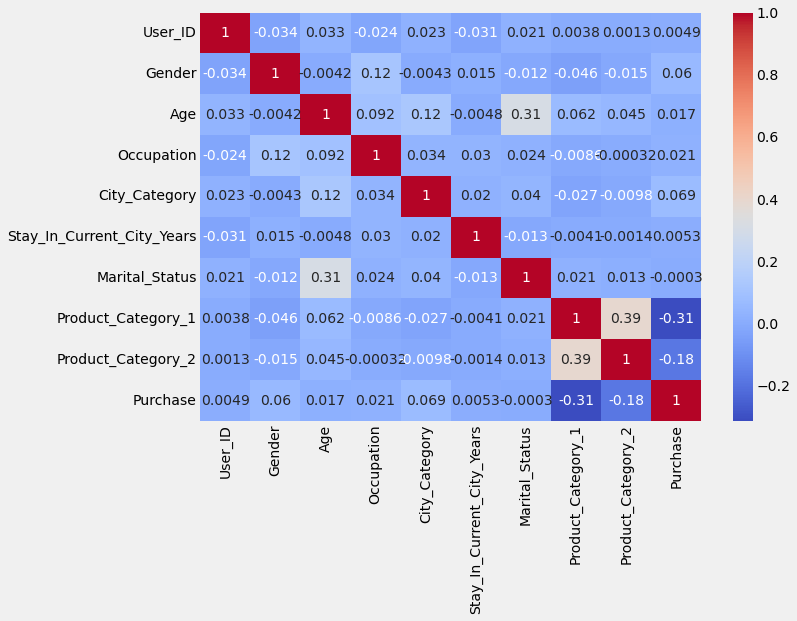

In [69]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [33]:
df.drop(columns=['User_ID', 'Product_ID'],inplace = True)


In [83]:
import pickle

with open('Outlier_New.pkl', 'wb') as f:
    pickle.dump(df,f)
    

In [29]:
import pickle

In [30]:
with open('Outlier_New.pkl', 'rb') as f:
    new_data = pickle.load(f)